<a href="https://colab.research.google.com/github/sahasraP7254/SahasraP/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving retail_transactions.csv to retail_transactions.csv


In [2]:
import pandas as pd

df = pd.read_csv("retail_transactions.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,White Hanging Heart T-Light Holder,6,2024-01-01 08:26,2.55,17850,United Kingdom
1,536365,71053,White Metal Lantern,6,2024-01-01 08:26,3.39,17850,United Kingdom
2,536366,84406B,Cream Cupid Hearts Coat Hanger,8,2024-01-01 08:28,2.75,13047,United Kingdom
3,536367,84029G,Knitted Union Flag Hot Water Bottle,6,2024-01-01 08:34,3.39,12583,France
4,536367,84029E,Red Union Flag Hot Water Bottle,6,2024-01-01 08:34,3.39,12583,France


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    50 non-null     int64  
 1   StockCode    50 non-null     object 
 2   Description  50 non-null     object 
 3   Quantity     50 non-null     int64  
 4   InvoiceDate  50 non-null     object 
 5   UnitPrice    50 non-null     float64
 6   CustomerID   50 non-null     int64  
 7   Country      50 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ KB


,InvoiceNo,Quantity,UnitPrice,CustomerID
count,50.000000,50.000000,50.000000,50.000000
mean,536387.600000,11.700000,3.638000,15172.820000
std,14.417959,9.008499,2.666086,2060.034175
min,536365.000000,2.000000,0.500000,12253.000000
25%,536375.250000,6.000000,1.875000,13263.000000
50%,536387.500000,8.000000,2.550000,14911.000000
75%,536399.750000,12.000000,4.950000,17548.000000
max,536412.000000,48.000000,12.750000,18210.000000


In [4]:
df.isnull().sum()



,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [6]:
# Fill missing quantities with median
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())

# Fill missing unit prices with median
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].median())

# Drop rows where Description (product name) is missing
df = df.dropna(subset=['Description'])

# Drop rows where Country is missing
df = df.dropna(subset=['Country'])

df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [7]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,White Hanging Heart T-Light Holder,6,2024-01-01 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,White Metal Lantern,6,2024-01-01 08:26,3.39,17850,United Kingdom,20.34
2,536366,84406B,Cream Cupid Hearts Coat Hanger,8,2024-01-01 08:28,2.75,13047,United Kingdom,22.00
3,536367,84029G,Knitted Union Flag Hot Water Bottle,6,2024-01-01 08:34,3.39,12583,France,20.34
4,536367,84029E,Red Union Flag Hot Water Bottle,6,2024-01-01 08:34,3.39,12583,France,20.34


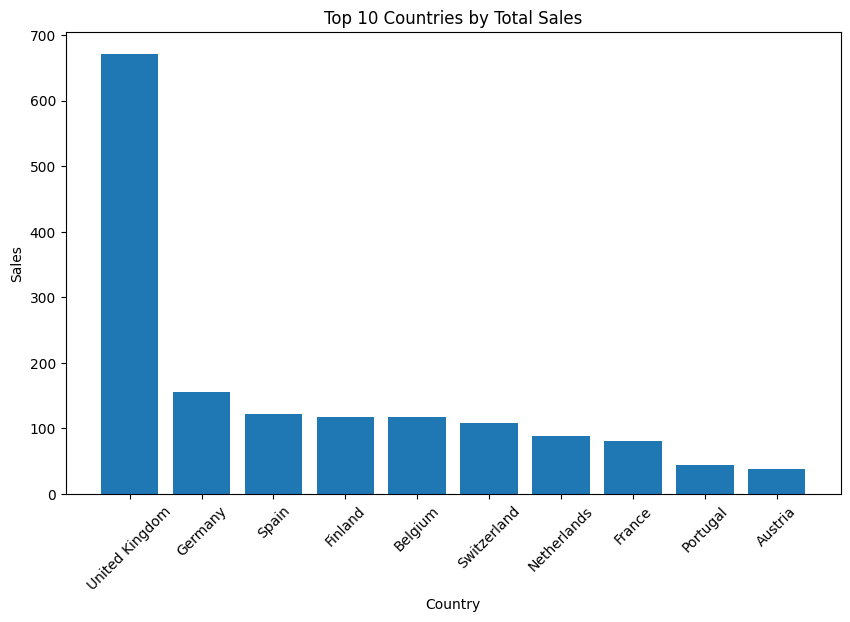

In [8]:
import matplotlib.pyplot as plt

country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(country_sales.index[:10], country_sales.values[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Total Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.show()


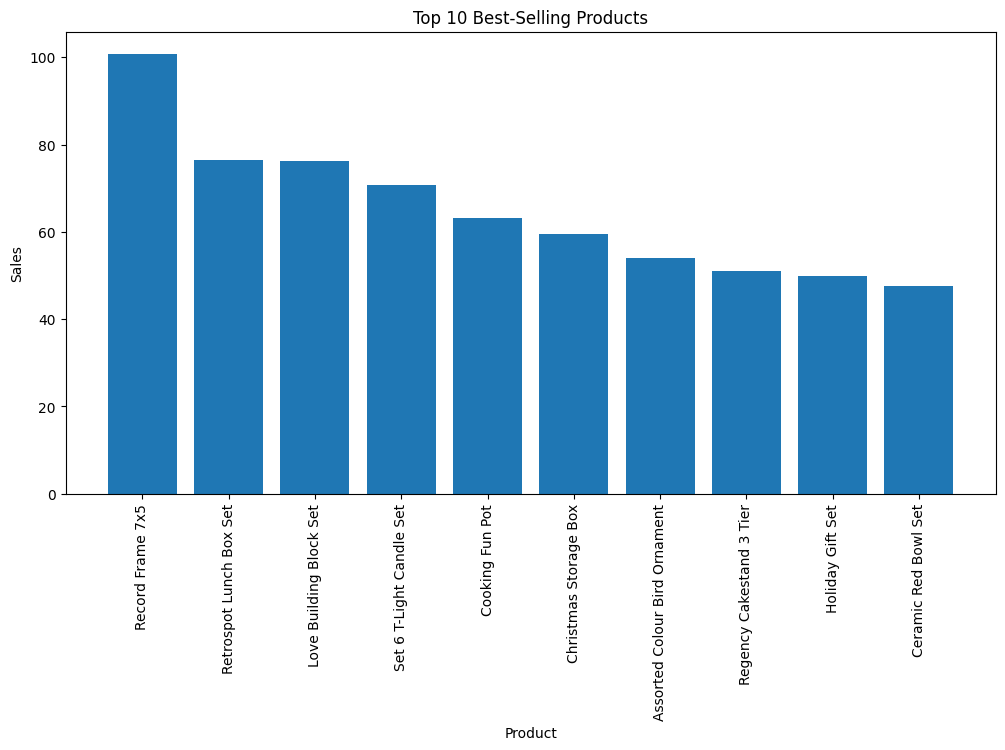

In [9]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=90)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()
